# 주식 자산 평가

## 주식 평가
* 1. 소유 주식 종가 정보 가져온다.
* 2. 전고점 대비 현재 종가의 변동 비율을 구한다.
* 3. 시각화한다.

In [1]:
import FinanceDataReader as fdr
import pandas as pd
from tqdm import tqdm

## 여러 종목 불러와 df 만들기

In [2]:
# AAPL : apple
# MSFT : microsoft
# TSLA : tesla
# NVDA : nvidia
# IVV : iShares Core S&P 500 ETF
# SPYG : SPDR® Portfolio S&P 500 Growth ETF
# VYM : Vanguard High Dividend Yield Index Fund ETF Shares

# 셀트리온 : '068270'
# 삼성전자 : '005930'
# 인선이엔티 : '060150'
# 스튜디오드래곤 : '253450'
# KT : '030200'

### 해외 주식

In [3]:
us_stock_dic = {'AAPL' : 'apple', 'MSFT' : 'microsoft', 'TSLA' : 'tesla', 'NVDA' : 'nvidia',
'IVV' : 'IVV', 'SPYG' : 'SPYG', 'VYM' : 'VYM'}

In [4]:
start_date = '2021-1'

In [5]:
us_stock_df = pd.DataFrame()
for code in tqdm( us_stock_dic.keys() ):
    name = us_stock_dic[code]
    tmp = fdr.DataReader(code, start_date)
    tmp = tmp.rename(columns={'Close':name})
    us_stock_df = pd.concat([us_stock_df, tmp[name]], axis=1)
us_stock_df

100%|██████████| 7/7 [00:08<00:00,  1.23s/it]


,apple,microsoft,tesla,nvidia,IVV,SPYG,VYM
2021-01-04,129.41,217.69,729.77,131.13,370.22,54.50,90.40
2021-01-05,131.01,217.90,735.11,134.05,372.67,54.83,91.17
2021-01-06,126.60,212.25,755.98,126.14,374.92,54.36,93.46
2021-01-07,130.92,218.29,816.04,133.44,380.47,55.51,94.01
2021-01-08,132.05,219.62,880.02,132.77,382.64,56.10,94.03
...,...,...,...,...,...,...,...
2022-01-04,179.70,329.01,1149.59,292.90,479.68,72.43,114.02
2022-01-05,174.92,316.38,1088.12,276.04,470.33,70.13,113.59
2022-01-06,172.00,313.88,1064.70,281.78,469.98,69.90,114.02
2022-01-07,172.17,314.04,1026.96,272.47,468.10,69.22,114.55


In [6]:
us_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 2021-01-04 00:00:00 to 2022-01-10 00:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   apple      258 non-null    float64
 1   microsoft  258 non-null    float64
 2   tesla      258 non-null    float64
 3   nvidia     258 non-null    float64
 4   IVV        258 non-null    float64
 5   SPYG       258 non-null    float64
 6   VYM        258 non-null    float64
dtypes: float64(7)
memory usage: 16.1+ KB


In [7]:
us_stock_df = us_stock_df.reset_index()
# us_stock_df['index'] = us_stock_df['index'].astype(str)
us_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      258 non-null    datetime64[ns]
 1   apple      258 non-null    float64       
 2   microsoft  258 non-null    float64       
 3   tesla      258 non-null    float64       
 4   nvidia     258 non-null    float64       
 5   IVV        258 non-null    float64       
 6   SPYG       258 non-null    float64       
 7   VYM        258 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 16.2 KB


### 국내 주식

In [8]:
kr_stock_dic = {'068270':'셀트리온', '005930':'삼성전자', '060150':'인선이엔티', '253450':'스튜디오드래곤', '030200':'KT'}

In [9]:
kr_stock_df = pd.DataFrame()
for code in tqdm( kr_stock_dic.keys() ):
    name = kr_stock_dic[code]
    tmp = fdr.DataReader(code, start_date)
    tmp = tmp.rename(columns={'Close':name})
    kr_stock_df = pd.concat([kr_stock_df, tmp[name]], axis=1)
kr_stock_df

100%|██████████| 5/5 [00:00<00:00,  5.52it/s]


,셀트리온,삼성전자,인선이엔티,스튜디오드래곤,KT
2021-01-04,341065,83000,11450,94500,23800
2021-01-05,347935,83900,11600,100400,23950
2021-01-06,346954,82200,11600,99300,24000
2021-01-07,350880,82900,11650,99600,24650
2021-01-08,360204,88800,11600,99800,24400
...,...,...,...,...,...
2022-01-05,187500,77400,11600,92800,30800
2022-01-06,181000,76900,11600,87700,30250
2022-01-07,182500,78300,11600,87900,30250
2022-01-10,187000,78000,11450,88000,30800


In [10]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 2021-01-04 00:00:00 to 2022-01-11 00:00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   셀트리온     255 non-null    int64
 1   삼성전자     255 non-null    int64
 2   인선이엔티    255 non-null    int64
 3   스튜디오드래곤  255 non-null    int64
 4   KT       255 non-null    int64
dtypes: int64(5)
memory usage: 12.0+ KB


In [11]:
kr_stock_df = kr_stock_df.reset_index()
kr_stock_df.head()

,index,셀트리온,삼성전자,인선이엔티,스튜디오드래곤,KT
0,2021-01-04,341065,83000,11450,94500,23800
1,2021-01-05,347935,83900,11600,100400,23950
2,2021-01-06,346954,82200,11600,99300,24000
3,2021-01-07,350880,82900,11650,99600,24650
4,2021-01-08,360204,88800,11600,99800,24400


In [12]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    255 non-null    datetime64[ns]
 1   셀트리온     255 non-null    int64         
 2   삼성전자     255 non-null    int64         
 3   인선이엔티    255 non-null    int64         
 4   스튜디오드래곤  255 non-null    int64         
 5   KT       255 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 12.1 KB


## 종가 시각화

In [13]:
import matplotlib.pyplot as plt

In [14]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [15]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

### 해외 주식 종가 시각화

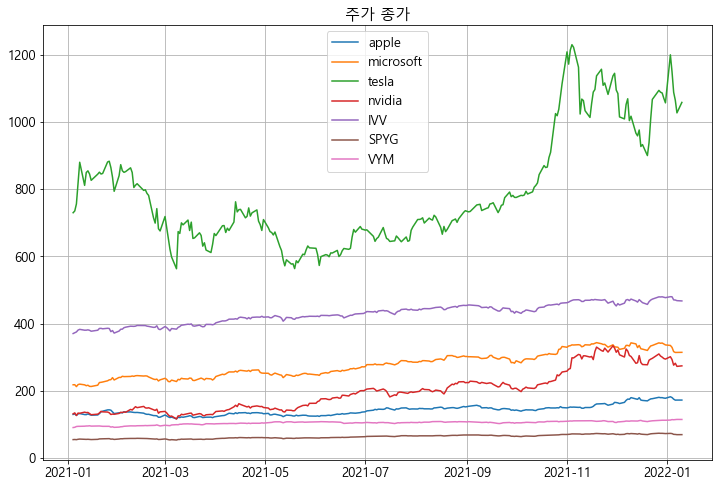

In [16]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('주가 종가', fontdict={'size':15})
for i in range(us_stock_df.shape[1]-1):
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i+1], label=us_stock_df.columns[i+1])
plt.legend(fontsize=13)

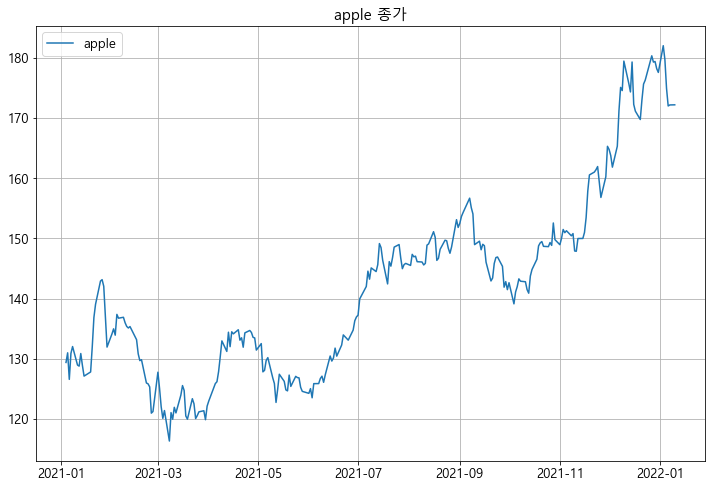

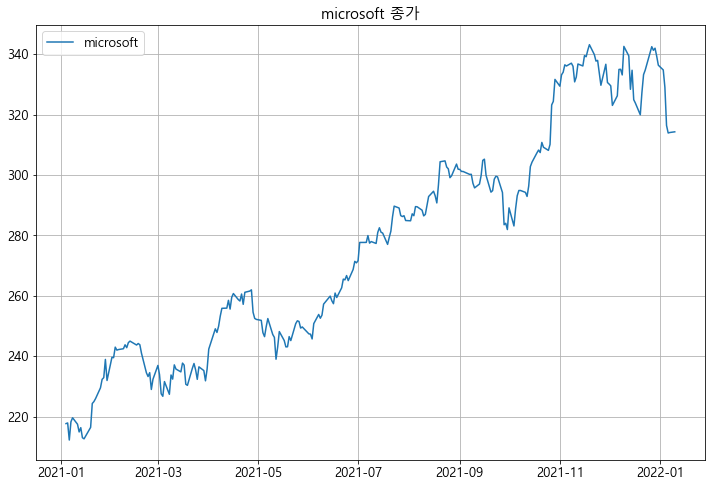

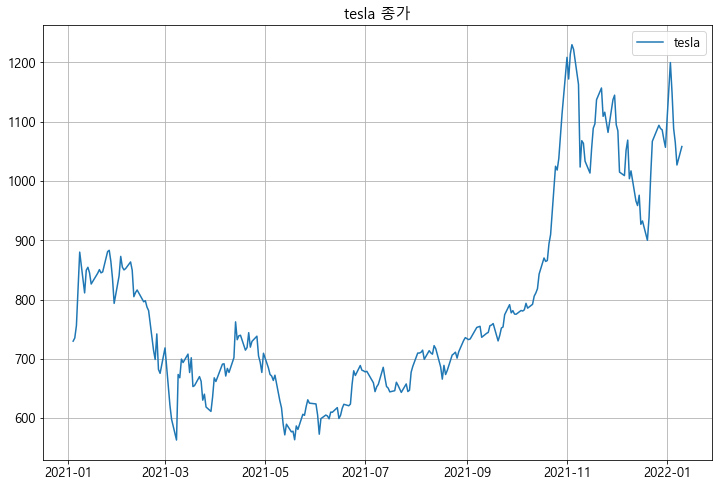

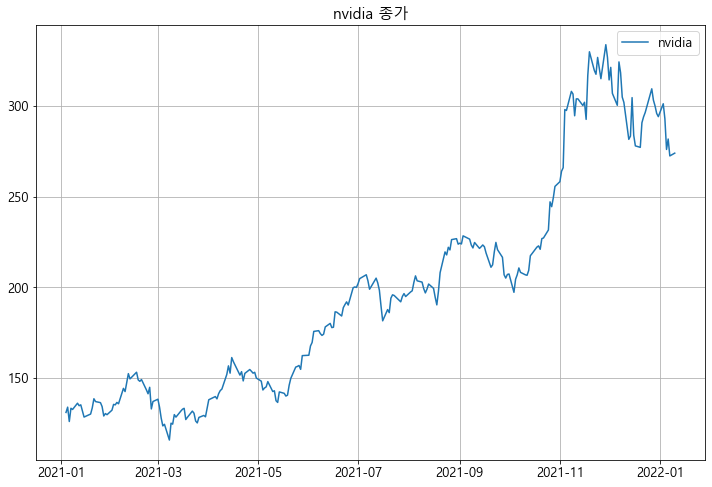

In [17]:
for i in range(1, us_stock_df.shape[1] // 2 + 1):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = us_stock_df.columns[i]
    plt.title(f'{stock_name} 종가', fontdict={'size':15})
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
    plt.legend(fontsize=13)

### 국내 주식 종가 시각화

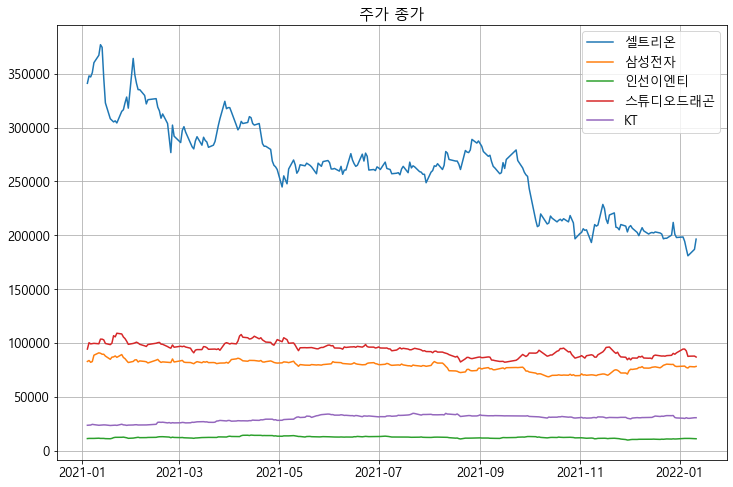

In [18]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('주가 종가', fontdict={'size':15})
for i in range(kr_stock_df.shape[1]-1):
    plt.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i+1], label=kr_stock_df.columns[i+1])
plt.legend(fontsize=13)

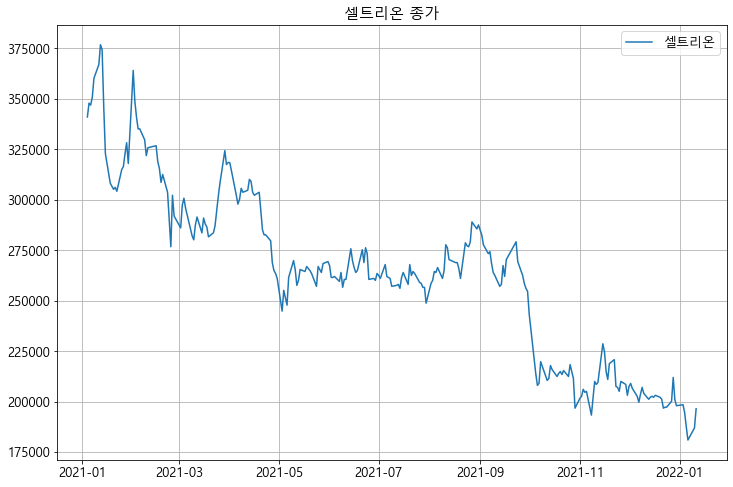

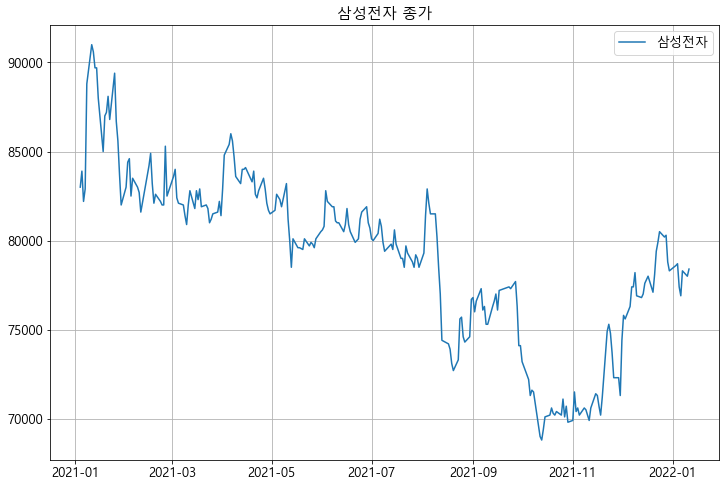

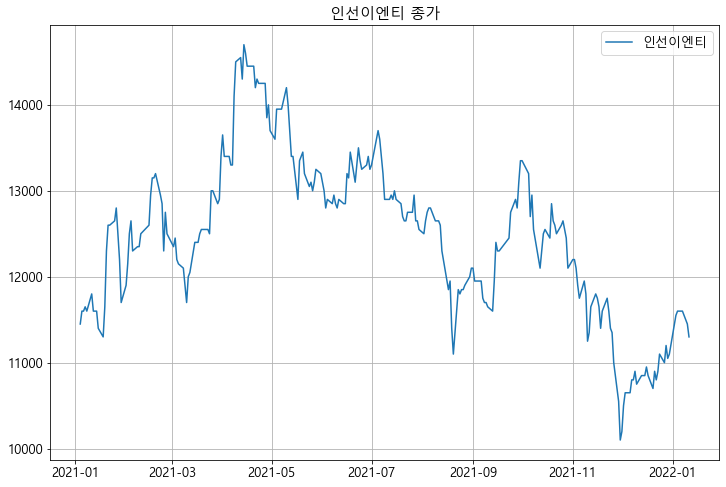

In [19]:
for i in range(1, kr_stock_df.shape[1] // 2 + 1):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = kr_stock_df.columns[i]
    plt.title(f'{stock_name} 종가', fontdict={'size':15})
    plt.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i], label=kr_stock_df.columns[i])
    plt.legend(fontsize=13)

## 전고점 대비 변화 비율 시각화

### 해외 주식 비율 계산

In [20]:
us_stock_df.columns[1:]

Index(['apple', 'microsoft', 'tesla', 'nvidia', 'IVV', 'SPYG', 'VYM'], dtype='object')

In [21]:
for stock_name in us_stock_df.columns[1:]:
    top_close = us_stock_df[stock_name].max()
    col_name = stock_name + '_rate'
    us_stock_df[col_name] = ( (us_stock_df[stock_name] - top_close) / top_close ) * 100    

In [22]:
us_stock_df.head()

,index,apple,microsoft,tesla,nvidia,IVV,SPYG,VYM,apple_rate,microsoft_rate,tesla_rate,nvidia_rate,IVV_rate,SPYG_rate,VYM_rate
0,2021-01-04,129.41,217.69,729.77,131.13,370.22,54.50,90.40,-28.899511,-36.553875,-40.664764,-60.711290,-22.845115,-25.830158,-21.082497
1,2021-01-05,131.01,217.90,735.11,134.05,372.67,54.83,91.17,-28.020438,-36.492670,-40.230586,-59.836409,-22.334528,-25.381056,-20.410301
2,2021-01-06,126.60,212.25,755.98,126.14,374.92,54.36,93.46,-30.443382,-38.139372,-38.533714,-62.206376,-21.865622,-26.020686,-18.411174
3,2021-01-07,130.92,218.29,816.04,133.44,380.47,55.51,94.01,-28.069886,-36.379004,-33.650430,-60.019175,-20.708986,-24.455634,-17.931034
4,2021-01-08,132.05,219.62,880.02,132.77,382.64,56.10,94.03,-27.449041,-35.991373,-28.448423,-60.219919,-20.256752,-23.652695,-17.913575


In [23]:
us_stock_df.shape

(258, 15)

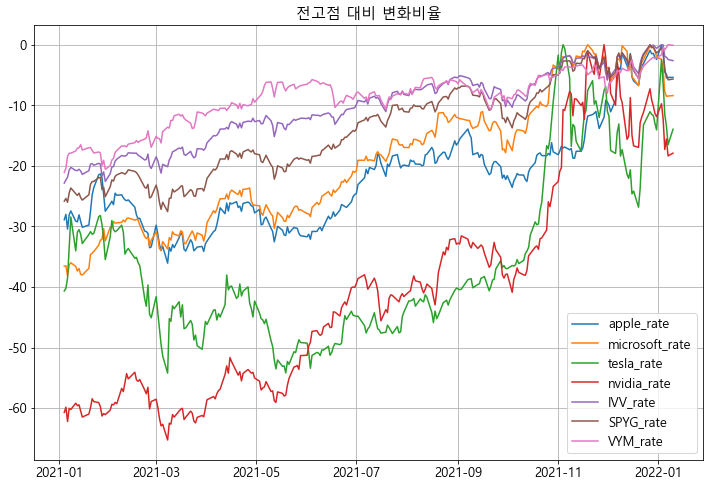

In [24]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('전고점 대비 변화비율', fontdict={'size':15})
for i in range(8,15):
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
plt.legend(fontsize=13)

### 해외 주식 개별 비율 시각화

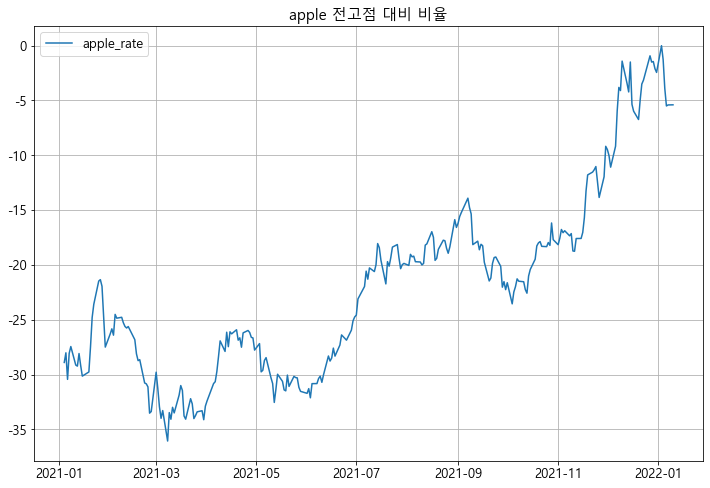

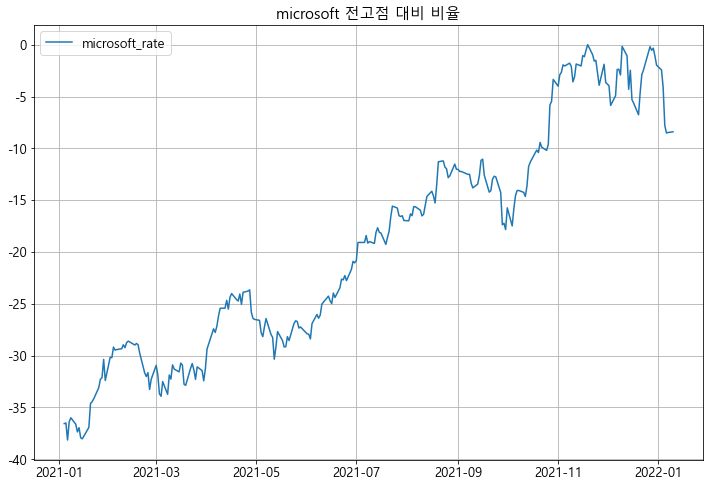

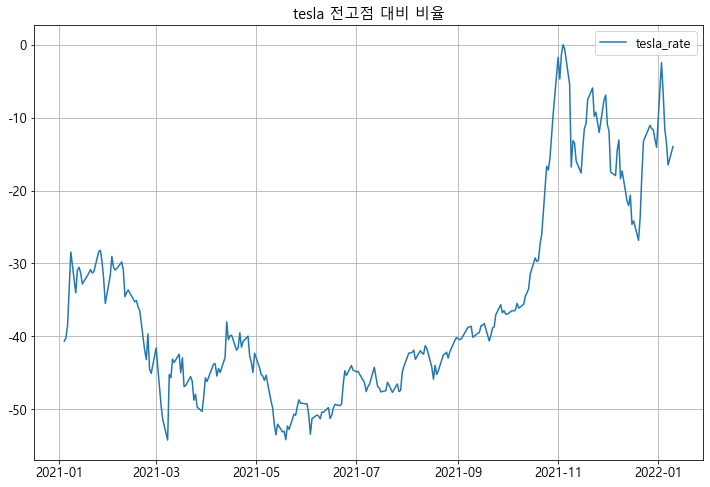

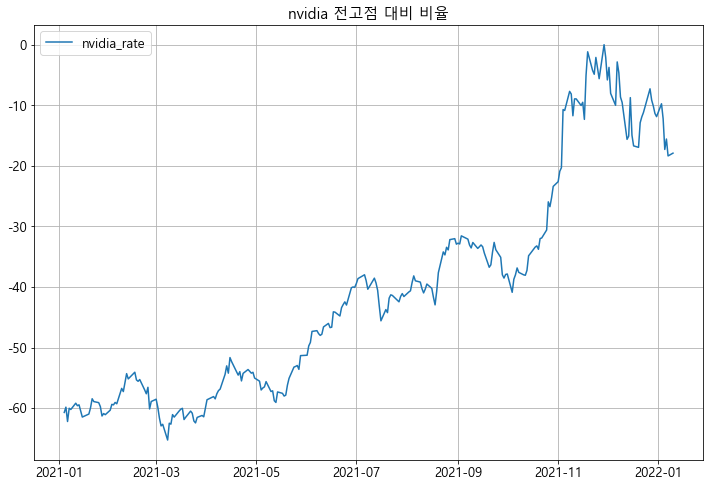

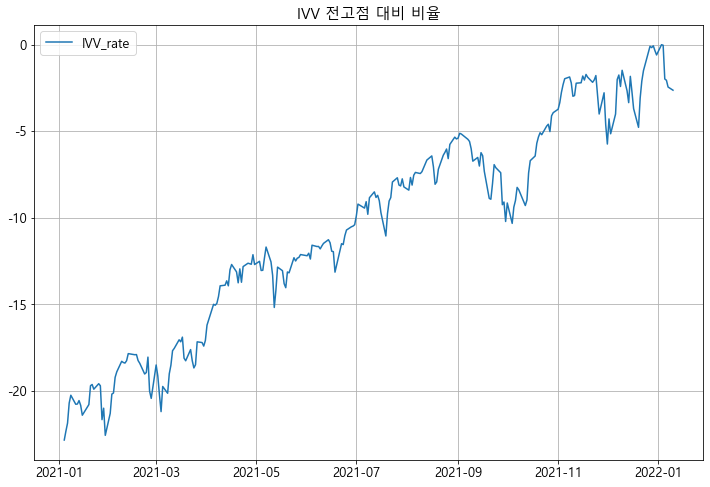

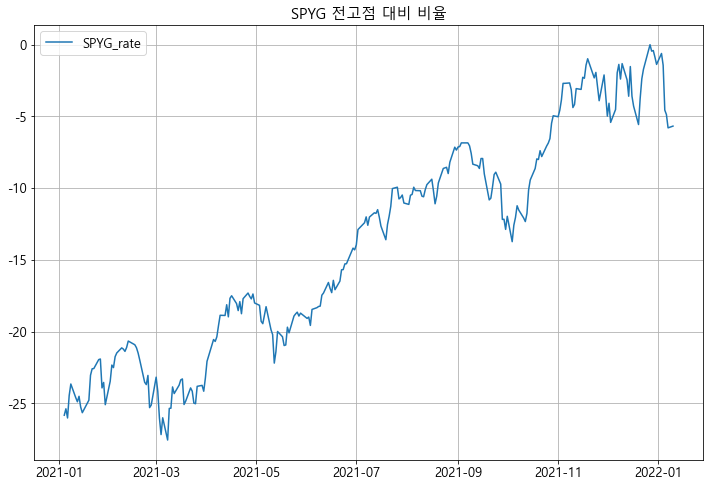

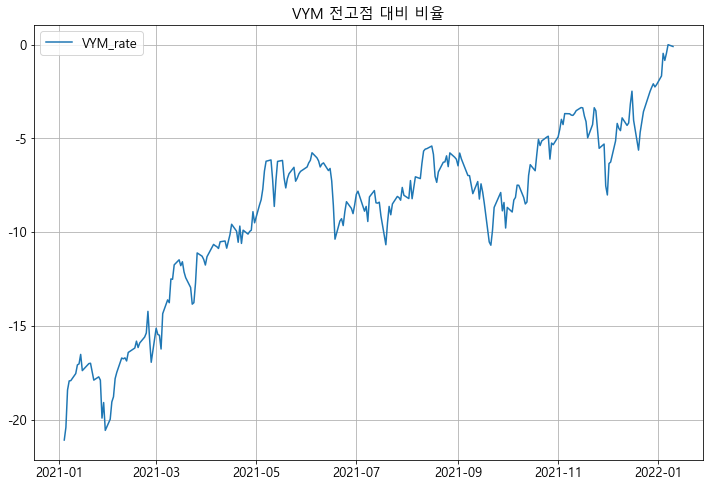

In [25]:
start_index = us_stock_df.shape[1] // 2 + 1
end_index = us_stock_df.shape[1]
for i in range(start_index,end_index):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = us_stock_df.columns[i][:-5]
    plt.title(f'{stock_name} 전고점 대비 비율', fontdict={'size':15})
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
    plt.legend(fontsize=13)

### 국내 주식 비율 계산

In [38]:
for stock_name in kr_stock_df.columns[1:]:
    top_close = kr_stock_df[stock_name].max()
    col_name = stock_name + '_rate'
    kr_stock_df[col_name] = ( (kr_stock_df[stock_name] - top_close) / top_close ) * 100    

In [39]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         253 non-null    datetime64[ns]
 1   셀트리온          253 non-null    int64         
 2   삼성전자          253 non-null    int64         
 3   인선이엔티         253 non-null    int64         
 4   스튜디오드래곤       253 non-null    int64         
 5   KT            253 non-null    int64         
 6   셀트리온_rate     253 non-null    float64       
 7   삼성전자_rate     253 non-null    float64       
 8   인선이엔티_rate    253 non-null    float64       
 9   스튜디오드래곤_rate  253 non-null    float64       
 10  KT_rate       253 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 21.9 KB


### 국내 주식 개별 비율 시각화

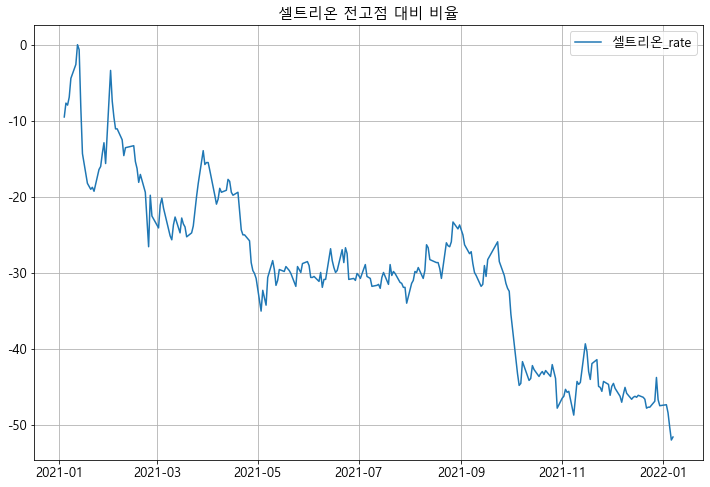

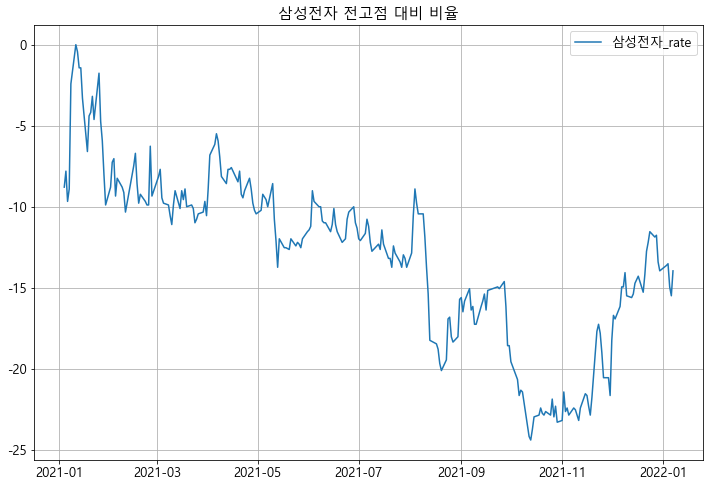

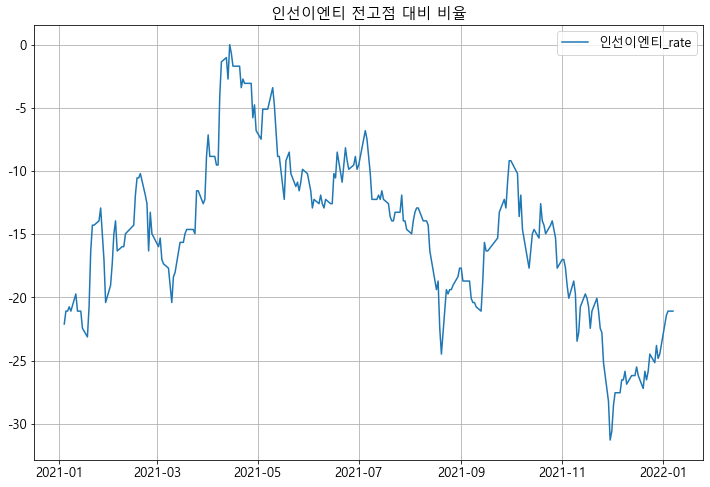

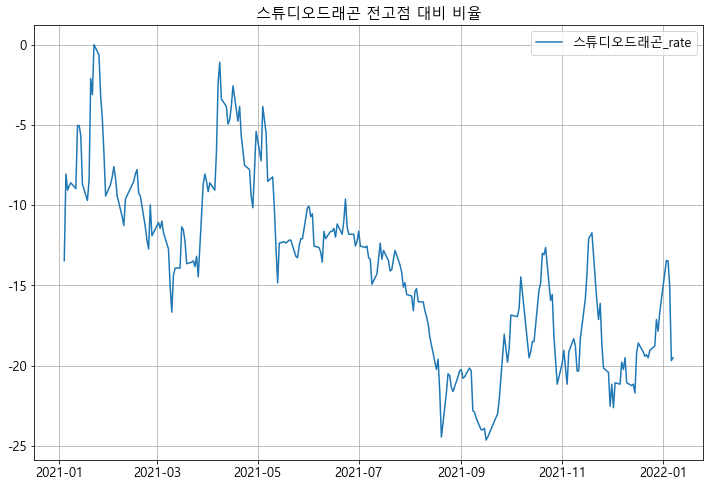

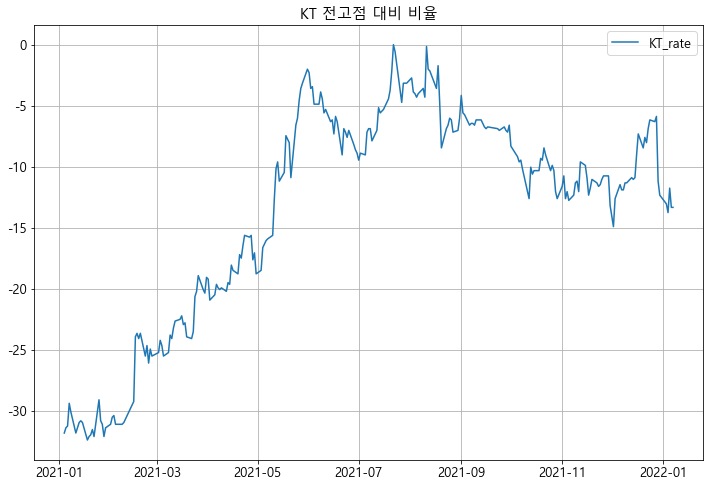

In [62]:
start_index = kr_stock_df.shape[1] // 2 + 1
end_index = kr_stock_df.shape[1]
for i in range(start_index, end_index):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = kr_stock_df.columns[i][:-5]
    plt.title(f'{stock_name} 전고점 대비 비율', fontdict={'size':15})
    plt.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i], label=kr_stock_df.columns[i])
    plt.legend(fontsize=13)

## 종가와 비율 한번에 시각화

### 해외 주식

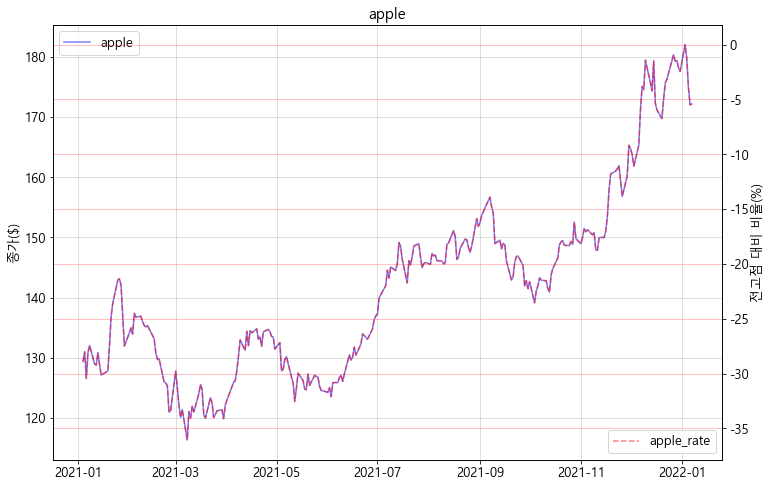

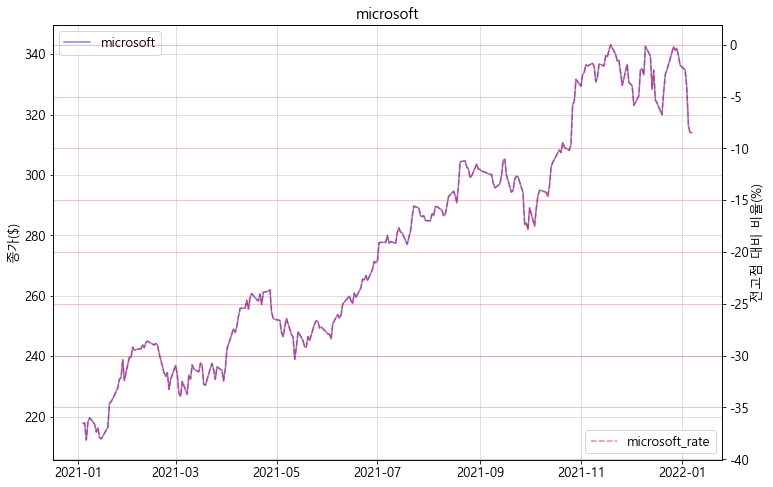

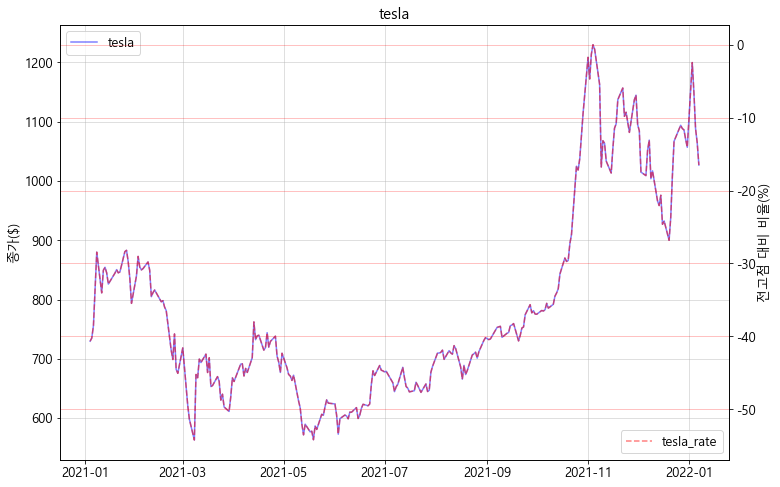

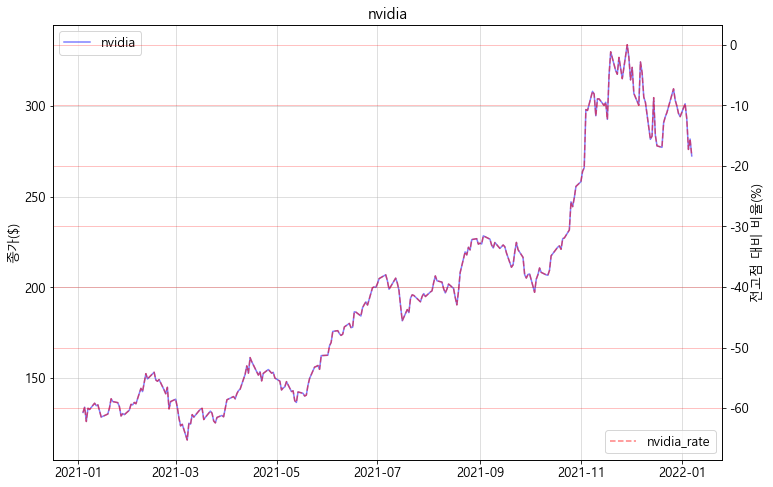

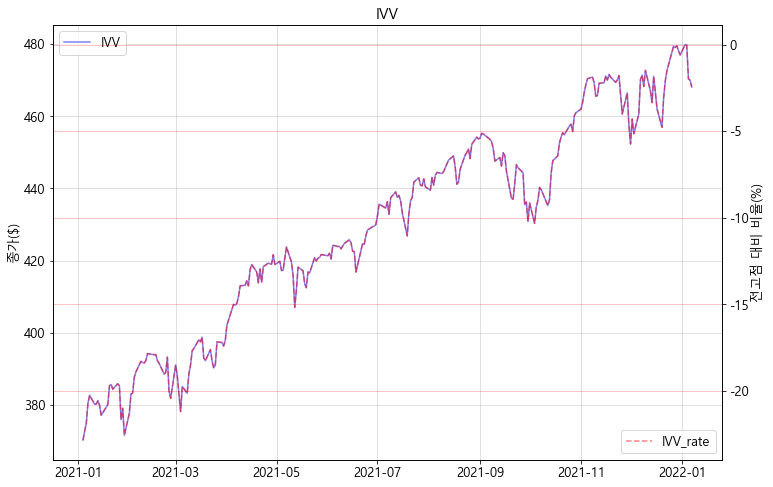

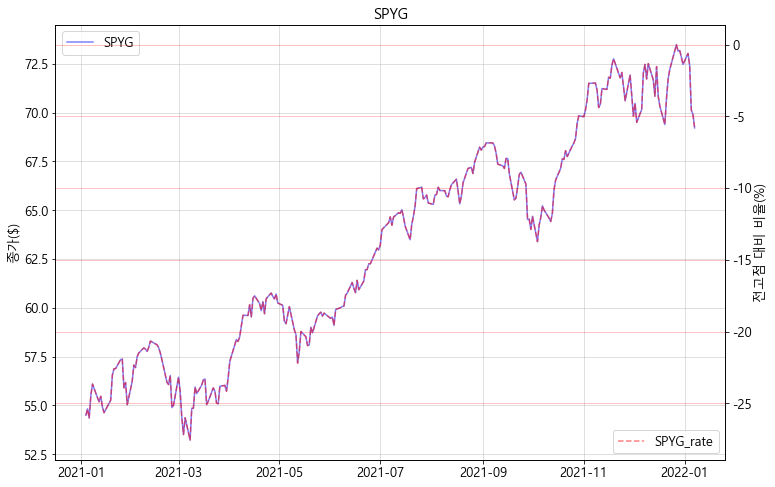

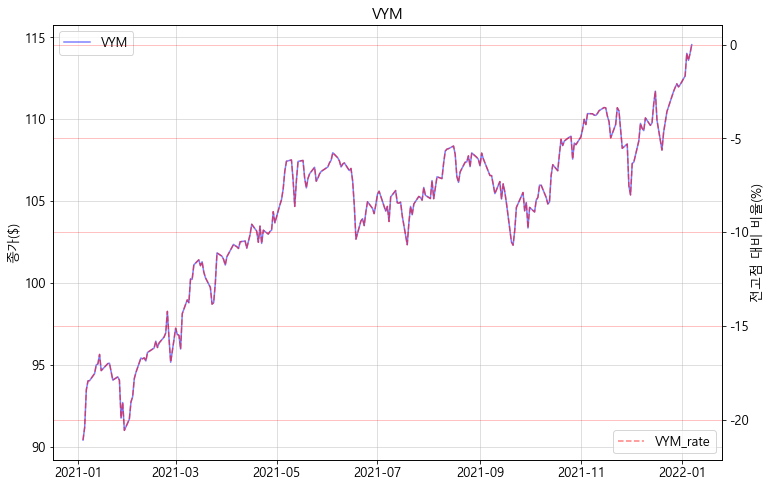

In [126]:
for i in range(1, us_stock_df.shape[1] // 2 + 1):
    plt.rcParams['figure.figsize'] = (12, 8)

    fig, ax1 = plt.subplots()
    ax1.grid(visible=True, alpha=0.5)
    stock_name = us_stock_df.columns[i]
    ax1.set_title(f'{stock_name}', fontdict={'size':15})
    ax1.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i], color='blue', alpha=0.5)
    ax1.set_ylabel('종가($)', fontdict={'size':13})
    ax1.tick_params(axis='y', labelsize=13)
    ax1.tick_params(axis='x', labelsize=13)
    ax1.legend(loc='upper left', fontsize=13)

    ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
    rate_index = i + (us_stock_df.shape[1] // 2)
    ax2.grid(visible=True, color='red', alpha=0.3)
    ax2.plot(us_stock_df['index'], us_stock_df.iloc[:,rate_index], '--', label=us_stock_df.columns[rate_index], color='red', alpha=0.5)
    ax2.set_ylabel('전고점 대비 비율(%)', fontdict={'size':13})
    ax2.tick_params(axis='y', labelsize=13)
    ax2.legend(loc='lower right', fontsize=13)


### 국내 주식

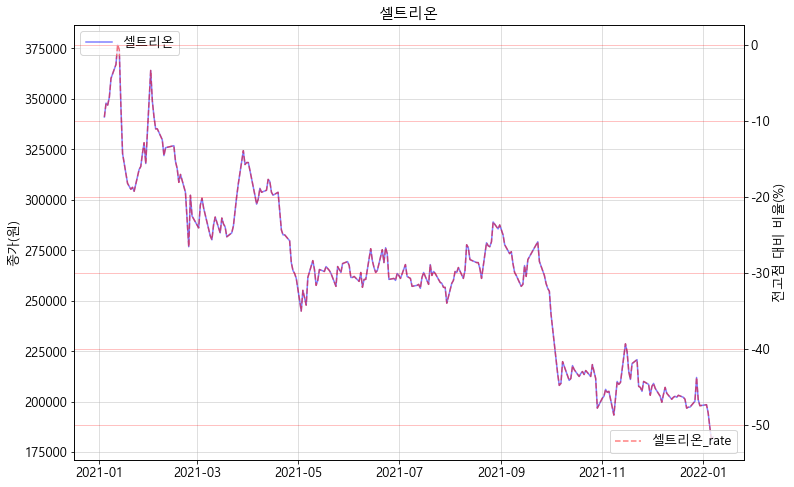

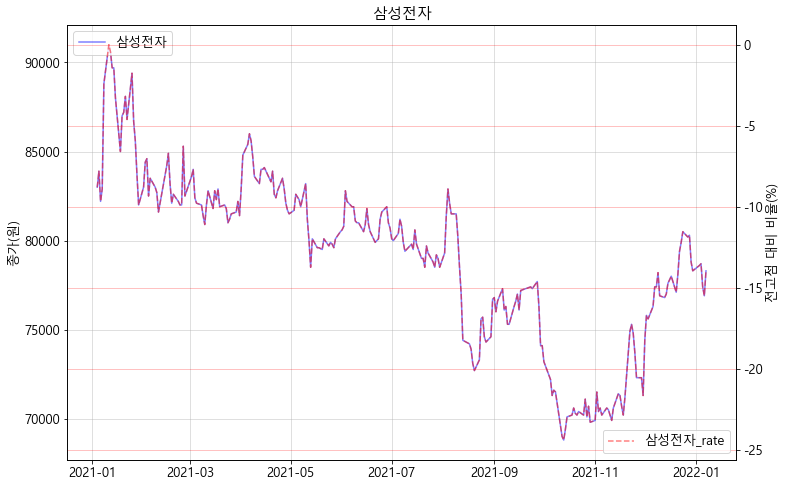

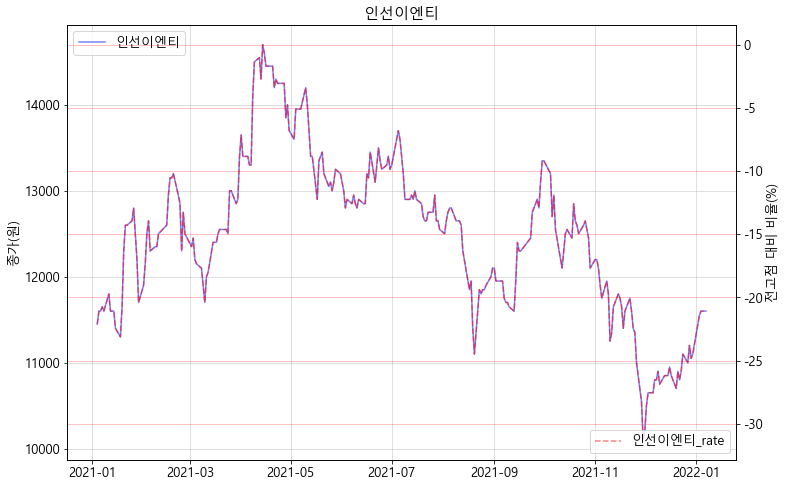

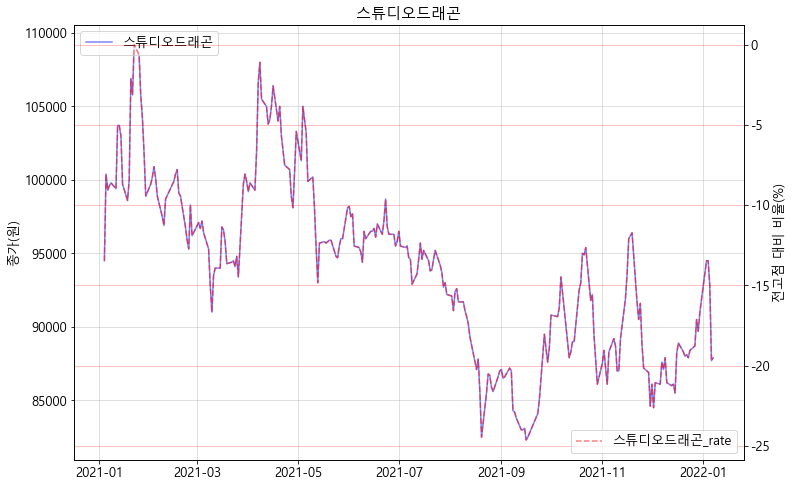

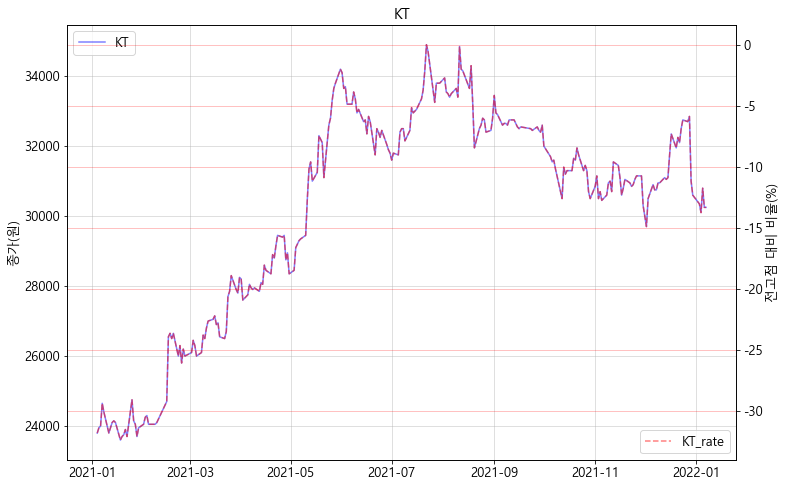

In [125]:
for i in range(1, kr_stock_df.shape[1] // 2 + 1):
    plt.rcParams['figure.figsize'] = (12, 8)

    fig, ax1 = plt.subplots()
    ax1.grid(visible=True, alpha=0.5)
    stock_name = kr_stock_df.columns[i]
    ax1.set_title(f'{stock_name}', fontdict={'size':15})
    ax1.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i], label=kr_stock_df.columns[i], color='blue', alpha=0.5)
    ax1.set_ylabel('종가(원)', fontdict={'size':13})
    ax1.tick_params(axis='y', labelsize=13)
    ax1.tick_params(axis='x', labelsize=13)
    ax1.legend(loc='upper left', fontsize=13)

    ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
    rate_index = i + (kr_stock_df.shape[1] // 2)
    ax2.grid(visible=True, color='red', alpha=0.3)
    ax2.plot(kr_stock_df['index'], kr_stock_df.iloc[:,rate_index], '--', label=kr_stock_df.columns[rate_index], color='red', alpha=0.5)
    ax2.set_ylabel('전고점 대비 비율(%)', fontdict={'size':13})
    ax2.tick_params(axis='y', labelsize=13)
    ax2.legend(loc='lower right', fontsize=13)


## 자산 비율 조정
* 1. 소유한 주식의 비중을 계산한다.
* 2. 시각화 한다.